# Analysis of dumps
## Raw Data
The test suite stores tcpdump output in a json format. Because this contains information about each packet, it can be parsed to determine information that would not normally be revealed by the transfer program itself. For example, how much overhead or compression there was.

In [1]:
from helpers import get_dump_fnames, get_dumps, organize_dumps

PROTOCOLS = ["scp", "hpn-scp", "ftp", "gridftp"]
N = None # The number of records to retrieve (None=all)

names = get_dump_fnames(PROTOCOLS, N)
dumps = get_dumps(names)

df, ids = organize_dumps(dumps)
# df = df.loc[[x.hour == 2 for x in df["Start Time"]]]
df

,Protocol,Batch ID,Start Time,File Size (bytes),Bytes Down,Bytes Up,Bytes Total,Ratio (%),Time (s),Speed (bytes/s)
0,ftp,5,2015-10-05 02:01:32,2540610608,2545605087,5590243,2551195330,1.004200e+02,101.43,2.509716e+07
1,ftp,2,2015-10-06 02:01:39,2540610608,2538839671,5787751,2544627422,1.001600e+02,108.45,2.341023e+07
2,ftp,1,2015-10-07 02:01:41,2540610608,2545945247,5628935,2551574182,1.004300e+02,104.74,2.430729e+07
3,ftp,7,2015-10-05 02:00:08,366448122,367191755,819963,368011718,1.004300e+02,15.94,2.303587e+07
4,ftp,0,2015-10-06 02:00:17,366448122,367104959,856559,367961518,1.004100e+02,18.20,2.017060e+07
5,ftp,4,2015-10-07 02:00:19,366448122,366398939,858463,367257402,1.002200e+02,16.82,2.178353e+07
6,ftp,3,2015-10-06 02:00:02,6,3143,3849,6992,1.165333e+05,1.22,2.576230e+03
7,ftp,6,2015-10-07 02:00:04,6,3143,3911,7054,1.175667e+05,1.22,2.576230e+03
8,gridftp,5,2015-10-05 02:06:06,2540610608,2462536267,4343,2462540610,9.693000e+01,89.92,2.738586e+07
9,gridftp,2,2015-10-06 02:06:14,2540610608,2480591211,4343,2480595554,9.764000e+01,104.79,2.367202e+07


## Aggregated Data
The table above can be aggregated per filesize and protocol, then displayed visually.

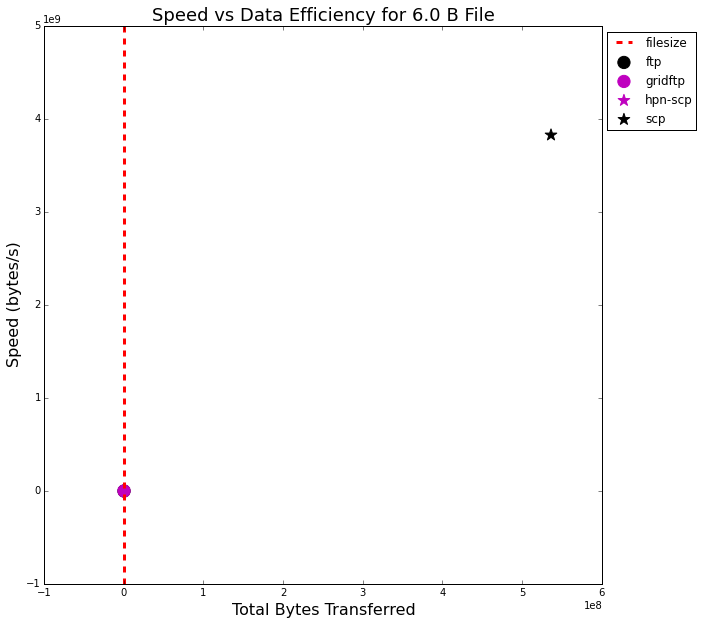

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams
from ipywidgets import interact, fixed
import numpy as np

from helpers import plot_speed_efficiency

rcParams['figure.figsize'] = (10, 10)

# Group by Filesize and then Protocol
agg = df.groupby(["File Size (bytes)", "Protocol"]).aggregate(np.mean)

sizes = {str(x):x for x in set(df["File Size (bytes)"])}
agg_interact = interact(plot_speed_efficiency, df=fixed(agg), filesize=sizes)


## Topography of Transfer
Displaying the packet sizes against a time axis gives more insight into each protocol. It's also a good representation of network conditions, as breaks or delays are easily seen.

There are 4 names in batch 2502707398948000518


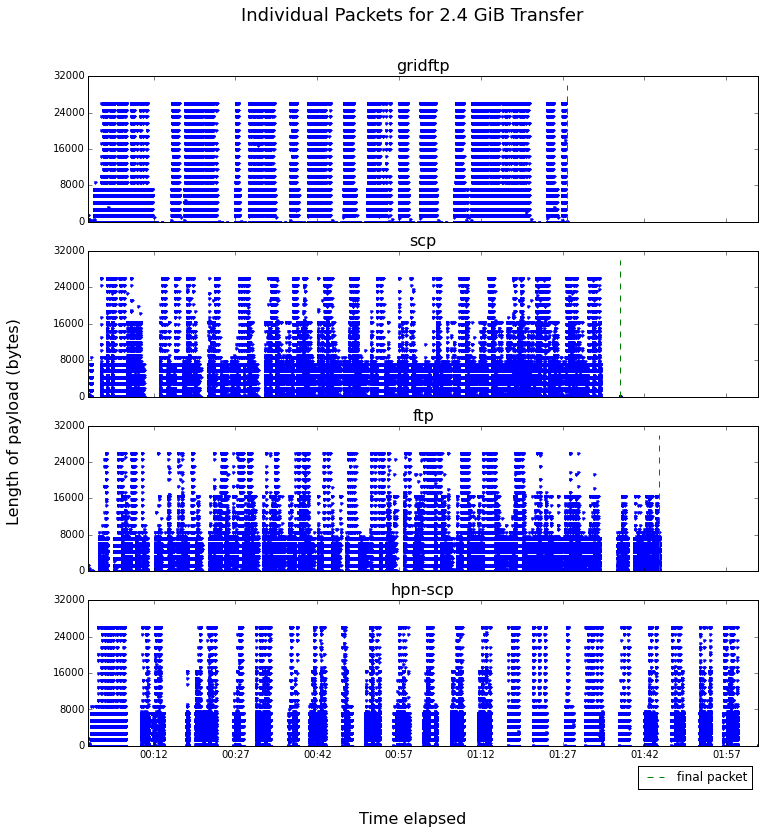

In [3]:
%matplotlib inline
from helpers import plot_packets
import warnings

warnings.simplefilter('ignore', UserWarning)
rcParams['figure.figsize'] = (12, 12)

def reverse_lookup(bid):
    for key, val in ids.items():
        if val == bid:
            return key
    return None

batch_ids = {str(x):reverse_lookup(x) for x in set(df["Batch ID"])}
packet_interact = interact(plot_packets, batch_id=batch_ids)